#### loading all functions for question 1

In [1]:
%matplotlib inline
# importing all the functions to be used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


"""
This function displays the recontructed image
param: ax represents the axis to be plotted
param: image represents the reconstructed image to show
param: title represents the title of the image.
"""
def show_reconstructed_image(ax, image, title):
    im = ax.imshow(image, interpolation='nearest')
    ax.set_title(title, fontsize=13)
    ax.axis('off')


"""
This function reconstructs the image with the illumination profile
:param rec_sample represents the reconstructed sample
:param img represents the image
:param illum_Profile represents the illumination profile  
"""

def reconstruct_image(rec_sample, img, illum_profile):
    for i in range(625):
        rec_sample  += img[i] * illum_profile.iloc[i,1]
    return rec_sample
    
"""
This function checks if the images are orthogonal and normalized.
:param posit represents positive images.
:param negat represents negative images.
:return check represents boolean if both conditions are true 
"""
def check_ortho_norm(posit, negat):
    check = False
    # checking for orthogonality
    # get the product of the positive and negative random image
    prod = posit * negat
    check_sum= np.sum(prod)
    # checking if the image is orthogonal and normalized
    if np.min(prod)>=0 and np.max(prod) <= 1 and check_sum == 0:
        check = True
    else:
        check = False    
    return check
    
    
"""
This function loads the random positive and negative images
:param image_path represents the path holding the image to be loaded.
:param zero_img_rand represent an array of random images with zero entries
:return pos_rand represents the positive images.
:return neg_rand represents the negative images.
"""
def load_random_images(zero_img_rand, image_path):
    # a total of 625 images for both positive and negative random images.
    for i in range(625):
    # load the positive random images.
        pos_rand = plt.imread(f"{image_path}/random_positive_{i+1:03d}.png")
        # load the negative random images
        neg_rand = plt.imread(f"{image_path}/random_negative_{i+1:03d}.png")
        # Total beam profile -> positive - negative images part
        zero_img_rand[i,:,:] = pos_rand - neg_rand 
    return zero_img_rand, pos_rand, neg_rand


"""
This function loads the hg positive and negative images
:param image_path represents the path holding the image to be loaded.
:param zero_img_hg represent an array of hg images with zero entries
:return pos_hg represents the positive images.
:return neg_hg represents the negative images.
"""
def load_hg_images(zero_img_hg, image_path):
    # a total of 625 images for both positive and negative random images.
    for i in range(625):
    # load the positive random images.
        pos_hg = plt.imread(f"{image_path}/hg_positive_{i+1:03d}.png")
        # load the negative random images
        neg_hg = plt.imread(f"{image_path}/hg_negative_{i+1:03d}.png")
        # Total beam profile -> positive - negative images part
        zero_img_hg[i,:,:] = pos_hg - neg_hg 
    return zero_img_hg, pos_hg, neg_hg


#### Using the orthogonal illumination approach, reconstruct the image taking into account the illuminations profiles and the “*.csv” files.

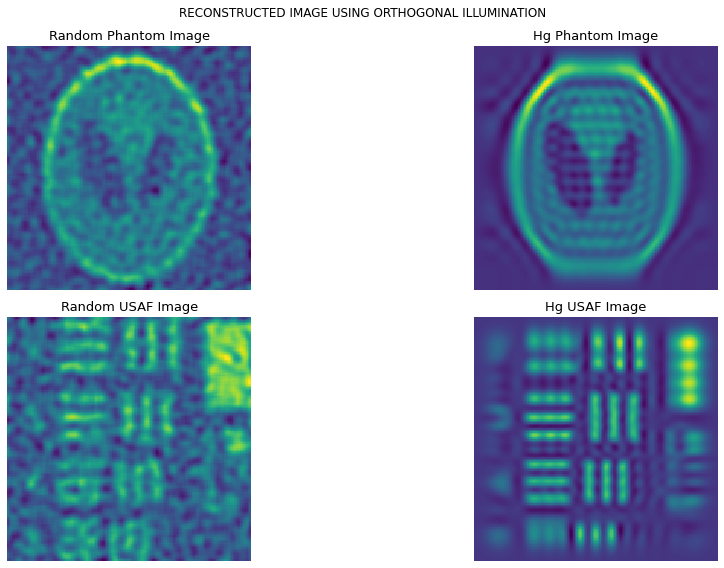

In [2]:
# go to the folder holding the files
path = '../id5220_coursework_data'

# combine the path and the file holding the csv containing the illumination profiles for hg and random csv
hg_csv = os.path.join(path, "illum-phantom-hg.csv")
random_csv = os.path.join(path, "illum-phantom-random.csv")
hg_usaf_csv = os.path.join(path, "illum-USAF-hg.csv")
random_usaf_csv = os.path.join(path, "illum-USAF-random.csv")

# combine the path with file holding the random and hg
random_images_path = os.path.join(path, "random")
hg_images_path = os.path.join(path, "hg")

# create an array of images with zero elements for both random and hg images
imgs_rand = np.zeros((625,160,160))
imgs_hg = np.zeros((625,160,160)) 

# create an array of empty reconstructed image for random and hg images.
rec_sample_random = np.zeros((160,160))
rec_sample_random_usaf = np.zeros((160,160))
rec_sample_hg = np.zeros((160,160))
rec_sample_hg_usaf = np.zeros((160,160))



# load the csv file for hg and random illumination profiles.
hg_csv_data = pd.read_csv(hg_csv, header = None)
random_csv_data = pd.read_csv(random_csv, header = None)
hg_usaf_csv_data = pd.read_csv(hg_usaf_csv, header = None)
random_usaf_csv_data = pd.read_csv(random_usaf_csv, header = None)


# load the random positive and negative images, and calculate the Total beam profile for random images
# beam_img represent the total beam profile for the random images.
beam_rand_img, positive_rand, negative_rand = load_random_images(imgs_rand, random_images_path)

# check if it orthogonal and normalized
rand_check = check_ortho_norm(positive_rand, negative_rand)

# it means it is orthogonal
if rand_check == True:
    # reconstruct the image for both phantom and usaf
    reconstructed_random_image = reconstruct_image(rec_sample_random, beam_rand_img, random_csv_data)
    reconstructed_random_usaf_image = reconstruct_image(rec_sample_random_usaf, beam_rand_img, random_usaf_csv_data)

 
# load the hg positive and negative images, and calculate the Total beam profile for hg
# beam_img represent the total beam profile for the random images.
beam_hg_img, positive_hg, negative_hg = load_hg_images(imgs_hg, hg_images_path)
# check if it is  orthogonal and normalized
hg_check = check_ortho_norm(positive_hg, negative_hg)
# it means it is orthogonal
if hg_check == True:
    # reconstruct the image
    reconstructed_hg_image = reconstruct_image(rec_sample_hg, beam_hg_img, hg_csv_data)
    reconstructed_hg_usaf_image = reconstruct_image(rec_sample_hg_usaf, beam_hg_img, hg_usaf_csv_data)
    

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
show_reconstructed_image(ax[0,0], reconstructed_random_image, "Random Phantom Image")
show_reconstructed_image(ax[0,1], reconstructed_hg_image, "Hg Phantom Image")
show_reconstructed_image(ax[1,0], reconstructed_random_usaf_image, "Random USAF Image")
show_reconstructed_image(ax[1,1], reconstructed_hg_usaf_image, "Hg USAF Image")

plt.suptitle("RECONSTRUCTED IMAGE USING ORTHOGONAL ILLUMINATION")
fig.tight_layout()
plt.savefig("orthogonal_illumination.png")
plt.show()

#### Redo using the compressive sensing approach by minimising the total variance of the final image.

In [3]:
# Recover the original image using total variation 
import cvxpy as cp

# declaring a list of variables to hold the Unknown samples for random, hg, and usaf random and hg images.
variables_phantom_random = []
variables_phantom_hg = []
variables_usaf_random = []
variables_usaf_hg = []

# declaring a list of variable to store the constraints
# Objective function (cp.Minimize) is subjected to the constraints.
constraints_phantom_random = []  #constraint for phantom_random 
constraints_phantom_hg = []   #constraint for phantom_hg 
constraints_usaf_random = []  #constraint for usaf_random 
constraints_usaf_hg = []  #constraint for usaf_hg

# creating an unknown sample for both random and hg images
U_phantom_random= cp.Variable(shape=(160, 160))
U_phantom_hg= cp.Variable(shape=(160, 160))
U_usaf_random= cp.Variable(shape=(160, 160))
U_usaf_hg= cp.Variable(shape=(160, 160))

# appending the unknown samples to the variable list, and setting the objective functions for each
variables_phantom_random.append(U_phantom_random)
obj_phantom_random = cp.Minimize(cp.tv(*variables_phantom_random))

variables_phantom_hg.append(U_phantom_hg)
obj_phantom_hg = cp.Minimize(cp.tv(*variables_phantom_hg))

variables_usaf_random.append(U_usaf_random)
obj_usaf_random = cp.Minimize(cp.tv(*variables_usaf_random))

variables_usaf_hg.append(U_usaf_hg)
obj_usaf_hg = cp.Minimize(cp.tv(*variables_usaf_hg))


# creating set of constraints
constraints_phantom_random = [random_csv_data.iloc[i,1] == cp.sum(cp.multiply(beam_rand_img[i,:,:],U_phantom_random)) for i in range(625)]
constraints_phantom_hg = [hg_csv_data.iloc[i,1] == cp.sum(cp.multiply(beam_hg_img[i,:,:],U_phantom_hg)) for i in range(625)]
constraints_usaf_random = [random_usaf_csv_data.iloc[i,1] == cp.sum(cp.multiply(beam_rand_img[i,:,:],U_usaf_random)) for i in range(625)]
constraints_usaf_hg = [hg_usaf_csv_data.iloc[i,1] == cp.sum(cp.multiply(beam_hg_img[i,:,:],U_usaf_hg)) for i in range(625)]


## modified from: https://www.cvxpy.org/examples/applications/tv_inpainting.html
#################################################################################
### optimizing... for random phantom
prob_a = cp.Problem(obj_phantom_random, constraints_phantom_random)
# Using SCS to solve the problem.
prob_a.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(obj_phantom_random.value))


### optimizing... for hg phantom
prob_b = cp.Problem(obj_phantom_hg, constraints_phantom_hg)
# Using SCS to solve the problem.
prob_b.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(obj_phantom_hg.value))

### optimizing... for random usaf
prob_c = cp.Problem(obj_usaf_random, constraints_usaf_random)
# Using SCS to solve the problem.
prob_c.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(obj_usaf_random.value))

### optimizing... for hg usaf
prob_d = cp.Problem(obj_usaf_hg, constraints_usaf_hg)
# Using SCS to solve the problem.
prob_d.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(obj_usaf_hg.value))

                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) May 19 02:27:27 PM: Your problem has 25600 variables, 625 constraints, and 0 parameters.
(CVXPY) May 19 02:27:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:27:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:27:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 19 02:27:27 PM: Compiling problem (target solver=SCS).
(CVXPY) May 19 02:27:27 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

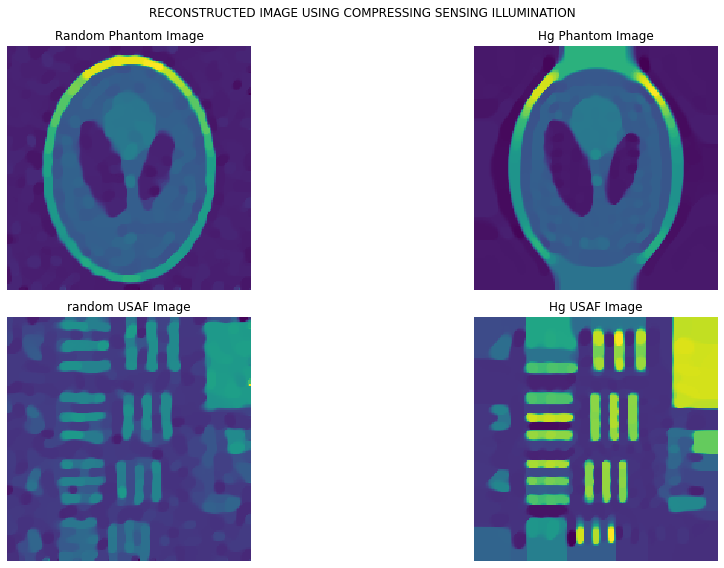

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## setting the value of this pixel to zero after minimisation to visualize the result appropriately.
variables_phantom_random.value[-1,-1] = 0
variables_phantom_hg.value[-1,-1] = 0
variables_usaf_random.value[-1,-1] = 0
variables_usaf_hg.value[-1,-1] = 0


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
show_reconstructed_image(ax[0,0], variables_phantom_random.value, "Random Phantom Image")
show_reconstructed_image(ax[0,1], variables_phantom_hg.value, "Hg Phantom Image")
show_reconstructed_image(ax[1,0], variables_usaf_random.value, "Random USAF Image")
show_reconstructed_image(ax[1,1], variables_usaf_hg.value, "Hg USAF Image")

plt.suptitle("RECONSTRUCTED IMAGE USING COMPRESSING SENSING ILLUMINATION")
fig.tight_layout()
plt.savefig("compressing_sensing_illumination.png")
plt.show()